# MULTIPLE LINEAR REGRESSION
## StreetEasy Dataset

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

* rental_id: rental ID
* rent: price of rent in dollars
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms
* size_sqft: size in square feet
* min_to_subway: distance from subway station in minutes
* floor: floor number
* building_age_yrs: building’s age in years
* no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
* has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
* has_washer_dryer: does it have washer/dryer in unit? (0/1)
* has_doorman: does it have a doorman? (0/1)
* has_elevator: does it have an elevator? (0/1)
* has_dishwasher: does it have a dishwasher (0/1)
* has_patio: does it have a patio? (0/1)
* has_gym: does the building have a gym? (0/1)
* neighborhood: (ex: Greenpoint)
* borough: (ex: Brooklyn)

More information about this dataset can be found in the StreetEasy Dataset article.

Let’s start by doing exploratory data analysis to understand the dataset better. We have broken the dataset  into:

* manhattan.csv
* brooklyn.csv
* queens.csv

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# import train_test_split

streeteasy = pd.read_csv("manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


In [14]:




streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# Add the code here:
mlr = LinearRegression()

mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_train)

sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)
#print(x_test[0])

print("predicted rent: $%.2f" % predict)



predicted rent: $2393.58


# Training Set vs. Test Set
As with most machine learning algorithms, we have to split our dataset into:

Training set: the data used to fit the model
Test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)
Training Set vs. Testing Set

In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.

Suppose you have some values in x and some values in y:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
Here are the parameters:

train_size: the proportion of the dataset to include in the train split (between 0.0 and 1.0)
test_size: the proportion of the dataset to include in the test split (between 0.0 and 1.0)
random_state: the seed used by the random number generator.

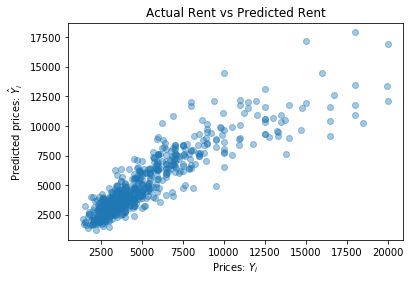

In [15]:


streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

plt.scatter(y_test, y_predict,alpha=0.4)
# Create x-axis label and y-axis label
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# MULTIPLE LINEAR REGRESSION
## Multiple Linear Regression Equation

Now that we have implemented Multiple Linear Regression, we will learn how to tune and evaluate the model. Before we do that, however, it’s essential to learn the equation behind it.

* Equation 6.1 The equation for multiple linear regression that uses two independent variables is this:

$ y = b + m_{1}x_{1} + m_{2}x_{2}y=b+m $
 
* Equation 6.2 The equation for multiple linear regression that uses three independent variables is this:

$ y = b + m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3}y=b+m $ 
 
* Equation 6.3 As a result, since multiple linear regression can use any number of independent variables, its general     equation becomes:

$ y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}y=b+m $ 

Here, m1, m2, m3, … mn refer to the coefficients, and b refers to the intercept that you want to find. You can plug these values back into the equation to compute the predicted y values.

Remember, with sklearn‘s LinearRegression() method, we can get these values with ease.

The .fit() method gives the model two variables that are useful to us:

.coef_, which contains the coefficients
.intercept_, which contains the intercept
After performing multiple linear regression, you can print the coefficients using .coef_.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.

In [16]:


streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()

model=mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

# Input code here:
print(mlr.coef_)


[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


# Multiple Linear Regression Equation
Now that we have implemented Multiple Linear Regression, we will learn how to tune and evaluate the model. Before we do that, however, it’s essential to learn the equation behind it.

* Equation 6.1 The equation for multiple linear regression that uses two independent variables is this:

$ y = b + m_{1}x_{1} + m_{2}x_{2}y=b+m $
	 
* Equation 6.2 The equation for multiple linear regression that uses three independent variables is this:

$ y = b + m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3}y=b+m $
 
* Equation 6.3 As a result, since multiple linear regression can use any number of independent variables, its general equation becomes:

$ y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}y=b+m $
	 
Here, m1, m2, m3, … mn refer to the coefficients, and b refers to the intercept that you want to find. You can plug these values back into the equation to compute the predicted y values.

Remember, with sklearn‘s LinearRegression() method, we can get these values with ease.

The .fit() method gives the model two variables that are useful to us:

* .coef_, which contains the coefficients
* .intercept_, which contains the intercept
After performing multiple linear regression, you can print the coefficients using .coef_.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.

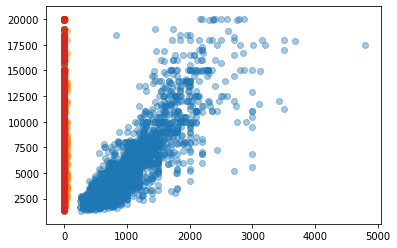

In [17]:

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)



plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)

plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)

plt.scatter(df[['bathrooms']], df[['rent']], alpha=0.4)
plt.show()

# Correlations
In our Manhattan model, we used 14 variables, so there are 14 coefficients:

$ [ -302.73009383  1199.3859951  4.79976742  -24.28993151  24.19824177  -7.58272473  -140.90664773  48.85017415  191.4257324  -151.11453388  89.408889  -57.89714551  -19.31948556  -38.92369828 ] $
* bedrooms - number of bedrooms
* bathrooms - number of bathrooms
* size_sqft - size in square feet
* min_to_subway - distance from subway station in minutes
* floor - floor number
* building_age_yrs - building’s age in years
* no_fee - has no broker fee (0 for fee, 1 for no fee)
* has_roofdeck - has roof deck (0 for no, 1 for yes)
* has_washer_dryer - has in-unit washer/dryer (0/1)
* has_doorman - has doorman (0/1)
* has_elevator - has elevator (0/1)
* has_dishwasher - has dishwasher (0/1)
* has_patio - has patio (0/1)
* has_gym - has gym (0/1)
To see if there are any features that don’t affect price linearly, let’s graph the different features against rent.

Interpreting graphs

In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values increase, Y values will decrease. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship. Here are two graphs indicating positive and negative linear relationships:

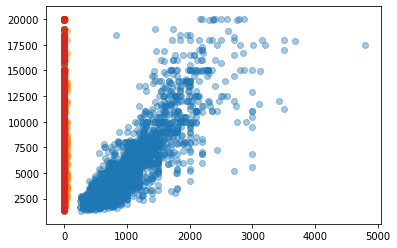

In [18]:


streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

# Input code here:

plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)

plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)

plt.scatter(df[['bathrooms']], df[['rent']], alpha=0.4)
plt.show()

# Evaluating the Model's Accuracy
When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is:

$e = y - \hat{y} $

	 
In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

sklearn‘s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction.

The coefficient R² is defined as:

$ 1 - \frac{u}{v} $

where u is the residual sum of squares:

* ((y - y_predict) ** 2).sum() 
and v is the total sum of squares (TSS):

* ((y - y.mean()) ** 2).sum()
The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

Train score:
0.7725460559817883
Test score:
0.805037197535764


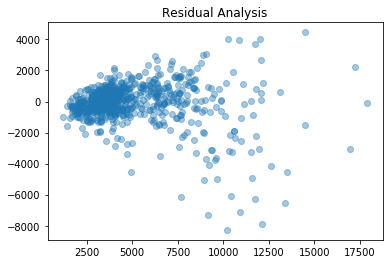

In [19]:

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()

model=mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

# Input code here:

print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))


residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()




# Rebuild the Model
Now let’s rebuild the model using the new features as well as evaluate the new model to see if we improved!

For Manhattan, the scores returned:

* Train score: 0.772546055982
* Test score:  0.805037197536

For Brooklyn, the scores returned:

* Train score: 0.613221453798
* Test score:  0.584349923873

For Queens, the scores returned:

* Train score: 0.665836031009
* Test score:  0.665170319781

For whichever borough you used, let’s see if we can improve these scores!

Train score:
0.7725460559817883
Test score:
0.805037197535764


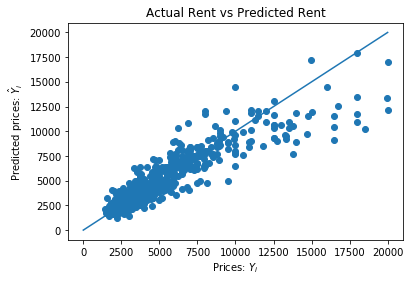

Predicted rent: $2592.38


In [20]:

from sklearn.metrics import mean_squared_error

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

zoe_apartment = [[1, 1, 620, 16, 1, 98, 0, 0, 1, 0, 0, 0, 1, 0]]
predict = model.predict(zoe_apartment)
print("Predicted rent: $%.2f" % predict)

# Review
Great work! Let’s review the concepts before you move on:

Multiple Linear Regression uses two or more variables to make predictions about another variable:

$ y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n} $

Multiple  linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it’s learned correctly, we can then use it to make predictions by plugging in new x values.
We can use scikit-learn’s LinearRegression() to perform multiple linear regression.
Residual Analysis is used to evaluate the regression model’s accuracy. In other words, it’s used to see if the model has learned the coefficients correctly.
Scikit-learn’s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction. The best score is 1.0.